In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Rutas de los archivos
train_path = "/content/drive/MyDrive/udea-ai4eng-20242/train.csv"
# test_path = "/content/drive/MyDrive/udea-ai4eng-20242/test.csv"  # Comentar esta línea temporalmente
# submission_path = "/content/drive/MyDrive/udea-ai4eng-20242/submission_example.csv"  # Comentar esta línea temporalmente

# Cargar los datasets
train_data = pd.read_csv(train_path)
# test_data = pd.read_csv(test_path)  # Comentar esta línea temporalmente
# submission_example = pd.read_csv(submission_path)  # Comentar esta línea temporalmente

# Mostrar las primeras filas para verificar que los datos se han cargado correctamente
print(train_data.head())


       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

             ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                       0   
2  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                       0   
4  Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0            Estrato 3                 Si    Técnica 

In [ ]:
print(train_data.columns)


Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')


In [ ]:
print(train_data.describe(include='all'))


                   ID        PERIODO ESTU_PRGM_ACADEMICO  \
count   692500.000000  692500.000000              692500   
unique            NaN            NaN                 948   
top               NaN            NaN             DERECHO   
freq              NaN            NaN               53244   
mean    494606.130576   20198.366679                 NaN   
std     285585.209455      10.535037                 NaN   
min          1.000000   20183.000000                 NaN   
25%     247324.750000   20195.000000                 NaN   
50%     494564.500000   20195.000000                 NaN   
75%     741782.500000   20203.000000                 NaN   
max     989286.000000   20213.000000                 NaN   

       ESTU_PRGM_DEPARTAMENTO          ESTU_VALORMATRICULAUNIVERSIDAD  \
count                  692500                                  686213   
unique                     31                                       8   
top                    BOGOTÁ  Entre 1 millón y menos de 2.5

In [ ]:
print(train_data.isnull().sum())


ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


In [ ]:
print(train_data['ESTU_PRGM_ACADEMICO'].value_counts())


ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Rutas de los archivos
train_path = "/content/drive/MyDrive/udea-ai4eng-20242/train.csv"

# Cargar el conjunto de datos
df = pd.read_csv(train_path)

# Comprobar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Convertir 'ESTU_VALORMATRICULAUNIVERSIDAD' de texto a numérico
def convert_to_numeric(value):
    if isinstance(value, str):  # Verificar si el valor es una cadena
        if 'menos de' in value:
            return float(value.split(' ')[-2])  # Obtener el límite inferior
        elif 'Entre' in value:
            return (float(value.split(' ')[-4]) + float(value.split(' ')[-2])) / 2  # Promedio de los límites
        elif 'más de' in value:
            return float(value.split(' ')[-2]) + 1  # Asumir un valor superior
    return np.nan  # Para valores no procesables

df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].apply(convert_to_numeric)

# Comprobar nuevamente los valores nulos después de la conversión
print("Valores nulos por columna después de la conversión:")
print(df.isnull().sum())

# Imputar valores nulos
df['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(df['ESTU_VALORMATRICULAUNIVERSIDAD'].median(), inplace=True)
df['ESTU_HORASSEMANATRABAJA'].fillna(0, inplace=True)  # Imputar 0 si no trabaja
df['FAMI_ESTRATOVIVIENDA'].fillna(df['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)
df['FAMI_TIENEINTERNET'].fillna(df['FAMI_TIENEINTERNET'].mode()[0], inplace=True)
df['FAMI_EDUCACIONPADRE'].fillna(df['FAMI_EDUCACIONPADRE'].mode()[0], inplace=True)
df['FAMI_EDUCACIONMADRE'].fillna(df['FAMI_EDUCACIONMADRE'].mode()[0], inplace=True)
df['ESTU_PAGOMATRICULAPROPIO'].fillna(0, inplace=True)

# Convertir 'ESTU_HORASSEMANATRABAJA' a numérico
horas_mapping = {
    'Menos de 10 horas': 5,  # Asumiendo un valor promedio
    '10 horas': 10,
    '20 horas': 20,
    '30 horas': 30,
    '40 horas': 40,
    'Más de 40 horas': 45  # Asumiendo un valor promedio
}
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].replace(horas_mapping)

# Asegúrate de convertir a numérico después del mapeo
df['ESTU_HORASSEMANATRABAJA'] = pd.to_numeric(df['ESTU_HORASSEMANATRABAJA'], errors='coerce')

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], drop_first=True)

# Eliminar columnas irrelevantes (ajusta según sea necesario)
df.drop(['ID'], axis=1, inplace=True)

# Normalización/Estandarización
scaler = StandardScaler()
df[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']] = scaler.fit_transform(df[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']])

# Mostrar el tamaño del DataFrame después de limpiar
print(f"Tamaño del DataFrame después de limpiar: {df.shape}")



Valores nulos por columna:
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64
Valores nulos por columna después de la conversión:
ID                                     0
PERIODO                                0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_VALORMATRICULAUNIVERSIDAD    174092
ESTU_HORASSEMANATRABAJA            30857
FAMI_ESTRATOVIVIENDA               32137
FAMI_TIENEINTERNET                 26629
FAMI_EDUCACIONPADRE                23178
FAMI_EDUCACIONMADRE                23664
ESTU_PAGOMATRICULA

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Rutas de los archivos
train_path = "/content/drive/MyDrive/udea-ai4eng-20242/train.csv"

# Cargar el conjunto de datos
df = pd.read_csv(train_path)

# Comprobar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Convertir 'ESTU_VALORMATRICULAUNIVERSIDAD' de texto a numérico
def convert_to_numeric(value):
    if isinstance(value, str):  # Verificar si el valor es una cadena
        if 'menos de' in value:
            return float(value.split(' ')[-2])  # Obtener el límite inferior
        elif 'Entre' in value:
            return (float(value.split(' ')[-4]) + float(value.split(' ')[-2])) / 2  # Promedio de los límites
        elif 'más de' in value:
            return float(value.split(' ')[-2]) + 1  # Asumir un valor superior
    return np.nan  # Para valores no procesables

df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].apply(convert_to_numeric)

# Comprobar nuevamente los valores nulos después de la conversión
print("Valores nulos por columna después de la conversión:")
print(df.isnull().sum())

# Imputar valores nulos
df['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(df['ESTU_VALORMATRICULAUNIVERSIDAD'].median(), inplace=True)
df['ESTU_HORASSEMANATRABAJA'].fillna(0, inplace=True)  # Imputar 0 si no trabaja
df['FAMI_ESTRATOVIVIENDA'].fillna(df['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)
df['FAMI_TIENEINTERNET'].fillna(df['FAMI_TIENEINTERNET'].mode()[0], inplace=True)
df['FAMI_EDUCACIONPADRE'].fillna(df['FAMI_EDUCACIONPADRE'].mode()[0], inplace=True)
df['FAMI_EDUCACIONMADRE'].fillna(df['FAMI_EDUCACIONMADRE'].mode()[0], inplace=True)
df['ESTU_PAGOMATRICULAPROPIO'].fillna(0, inplace=True)

# Convertir 'ESTU_HORASSEMANATRABAJA' a numérico
horas_mapping = {
    'Menos de 10 horas': 5,  # Asumiendo un valor promedio
    '10 horas': 10,
    '20 horas': 20,
    '30 horas': 30,
    '40 horas': 40,
    'Más de 40 horas': 45  # Asumiendo un valor promedio
}
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].replace(horas_mapping)

# Asegúrate de convertir a numérico después del mapeo
df['ESTU_HORASSEMANATRABAJA'] = pd.to_numeric(df['ESTU_HORASSEMANATRABAJA'], errors='coerce')

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], drop_first=True)

# Eliminar columnas irrelevantes (ajusta según sea necesario)
df.drop(['ID'], axis=1, inplace=True)

# Normalización/Estandarización
scaler = StandardScaler()
df[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']] = scaler.fit_transform(df[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']])

# Mostrar el tamaño del DataFrame después de limpiar
print(f"Tamaño del DataFrame después de limpiar: {df.shape}")


Valores nulos por columna:
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64
Valores nulos por columna después de la conversión:
ID                                     0
PERIODO                                0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_VALORMATRICULAUNIVERSIDAD    174092
ESTU_HORASSEMANATRABAJA            30857
FAMI_ESTRATOVIVIENDA               32137
FAMI_TIENEINTERNET                 26629
FAMI_EDUCACIONPADRE                23178
FAMI_EDUCACIONMADRE                23664
ESTU_PAGOMATRICULA

In [ ]:
# Mostrar algunos valores únicos en 'ESTU_VALORMATRICULAUNIVERSIDAD'
print("Valores únicos en 'ESTU_VALORMATRICULAUNIVERSIDAD':")
print(df['ESTU_VALORMATRICULAUNIVERSIDAD'].unique())


Valores únicos en 'ESTU_VALORMATRICULAUNIVERSIDAD':
[ 2.55078173  0.5591429   1.55496231 -0.43667652 -1.43249594]


In [ ]:
df.fillna({'ESTU_VALORMATRICULAUNIVERSIDAD': df['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()[0]}, inplace=True)  # Rellenar con la moda


In [ ]:
# Ejemplo de Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ESTU_VALORMATRICULAUNIVERSIDAD'] = label_encoder.fit_transform(df['ESTU_VALORMATRICULAUNIVERSIDAD'])


In [ ]:
import pandas as pd

# Cargar el dataset de entrenamiento
train_path = '/content/drive/MyDrive/udea-ai4eng-20242/train.csv'
train_data = pd.read_csv(train_path)

# 1. Obtener información general del dataset
print("Información general del dataset:")
train_data.info()

# 2. Verificar los primeros 5 registros del dataset
print("\nPrimeros 5 registros:")
print(train_data.head())

# 3. Revisar si hay valores nulos
print("\nValores nulos por columna:")
print(train_data.isnull().sum())

# 4. Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(train_data.describe())

# 5. Descripción de las columnas categóricas
print("\nDescripción de las columnas categóricas:")
print(train_data.describe(include='object'))

# 6. Ver los valores únicos en cada columna categórica
print("\nValores únicos por columna categórica:")
for column in train_data.select_dtypes(include=['object']).columns:
    print(f"{column}: {train_data[column].unique()}")


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dt

In [24]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset (asegúrate de que el dataset ya esté cargado en `train_data`)
train_data = pd.read_csv("/content/drive/MyDrive/udea-ai4eng-20242/train.csv")

# Columnas categóricas que se van a convertir
categorical_columns = [
    'ESTU_PRGM_ACADEMICO',
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'ESTU_PAGOMATRICULAPROPIO',
    'RENDIMIENTO_GLOBAL'
]

# Crear el objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas
for col in categorical_columns:
    # Verificar si la columna tiene valores nulos
    if train_data[col].isnull().sum() > 0:
        # Rellenar los valores nulos con una categoría "Desconocido"
        train_data[col] = train_data[col].fillna('Desconocido')

    # Transformar los valores categóricos en numéricos
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Verificar la transformación
print(train_data.head())


       ID  PERIODO  ESTU_PRGM_ACADEMICO  ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  300                       4   
1  645256    20212                  249                       3   
2  308367    20203                  819                       4   
3  470353    20195                   14                      26   
4  989032    20212                  907                       1   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                               4                        4   
1                               2                        0   
2                               2                        5   
3                               3                        0   
4                               2                        3   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                     3                   2                   12   
1                     3                   1                   11   
2                   

In [25]:
# Verificar si hay valores nulos
print("Valores nulos en cada columna:")
print(train_data.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(train_data.describe(include='all'))

# Opcional: Si deseas eliminar columnas con muchos valores nulos (por ejemplo, más del 50%)
threshold = len(train_data) * 0.5
train_data_cleaned = train_data.dropna(thresh=threshold, axis=1)

# Opcional: Si deseas eliminar filas con algún valor nulo
train_data_cleaned = train_data_cleaned.dropna()

# Verificar el tamaño del nuevo DataFrame
print(f"\nTamaño del DataFrame después de limpiar: {train_data_cleaned.shape}")


Valores nulos en cada columna:
ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64

Estadísticas descriptivas:
                  ID        PERIODO  ESTU_PRGM_ACADEMICO  \
count  692500.000000  692500.000000        692500.000000   
mean   494606.130576   20198.366679           417.852396   
std    285585.209455      10.535037           296.648616   
min         1.000000   20183.000000             0.000000   
25%    247324.750000   20195.000000           202.000000   
50%    494564.500000   20195.000000           376.000000   
75%    741782.500000   20203.000000           704.000000   
max    989286.00

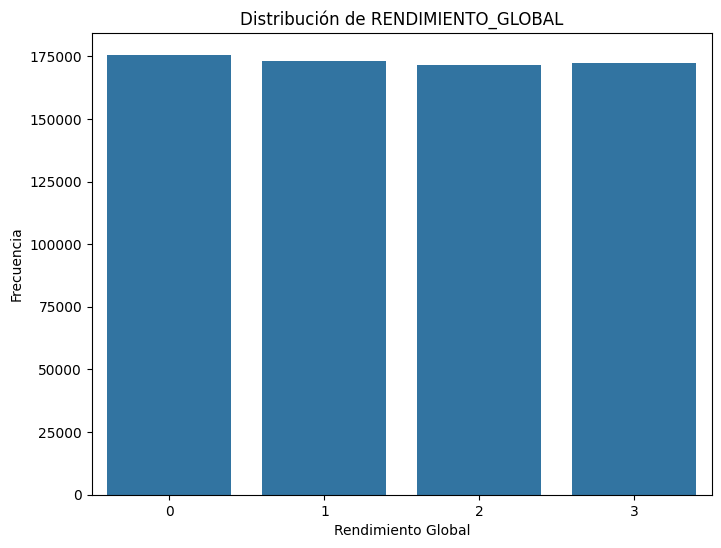

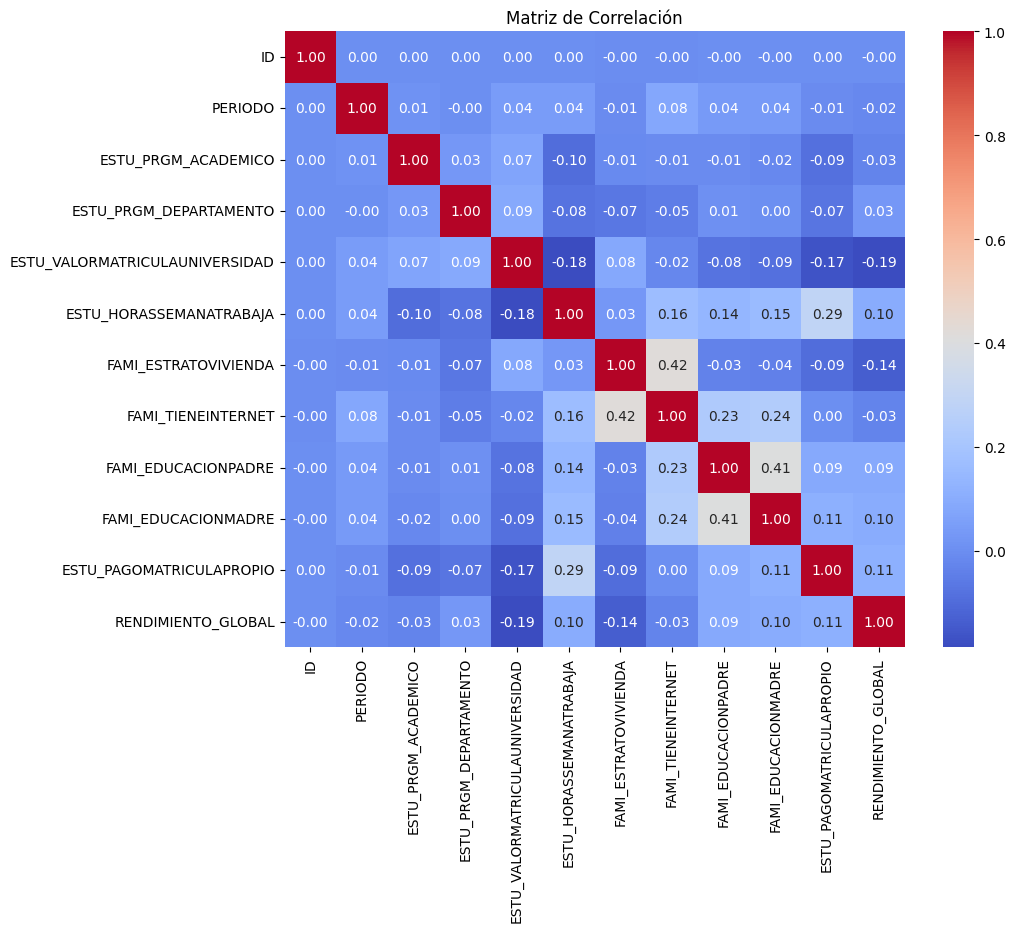

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable RENDIMIENTO_GLOBAL
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='RENDIMIENTO_GLOBAL')
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xlabel('Rendimiento Global')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la correlación entre variables
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


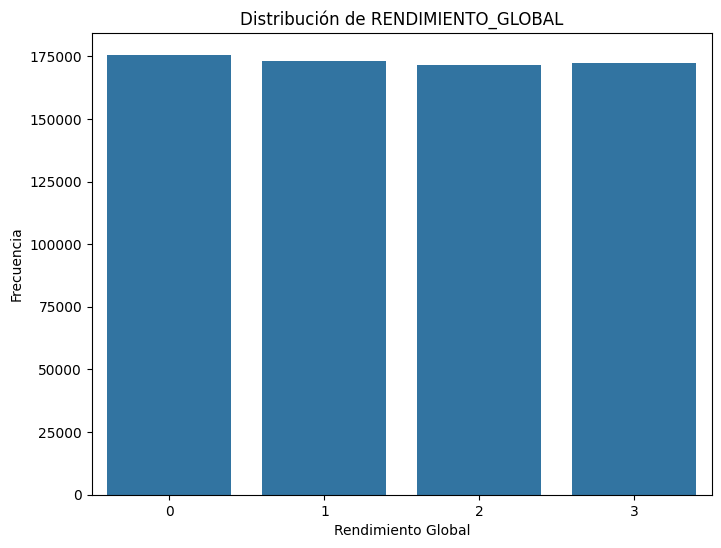

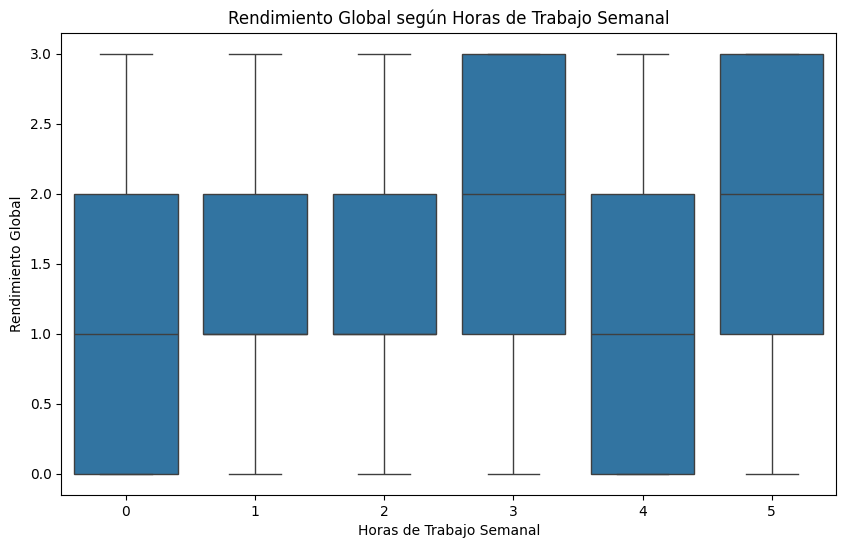

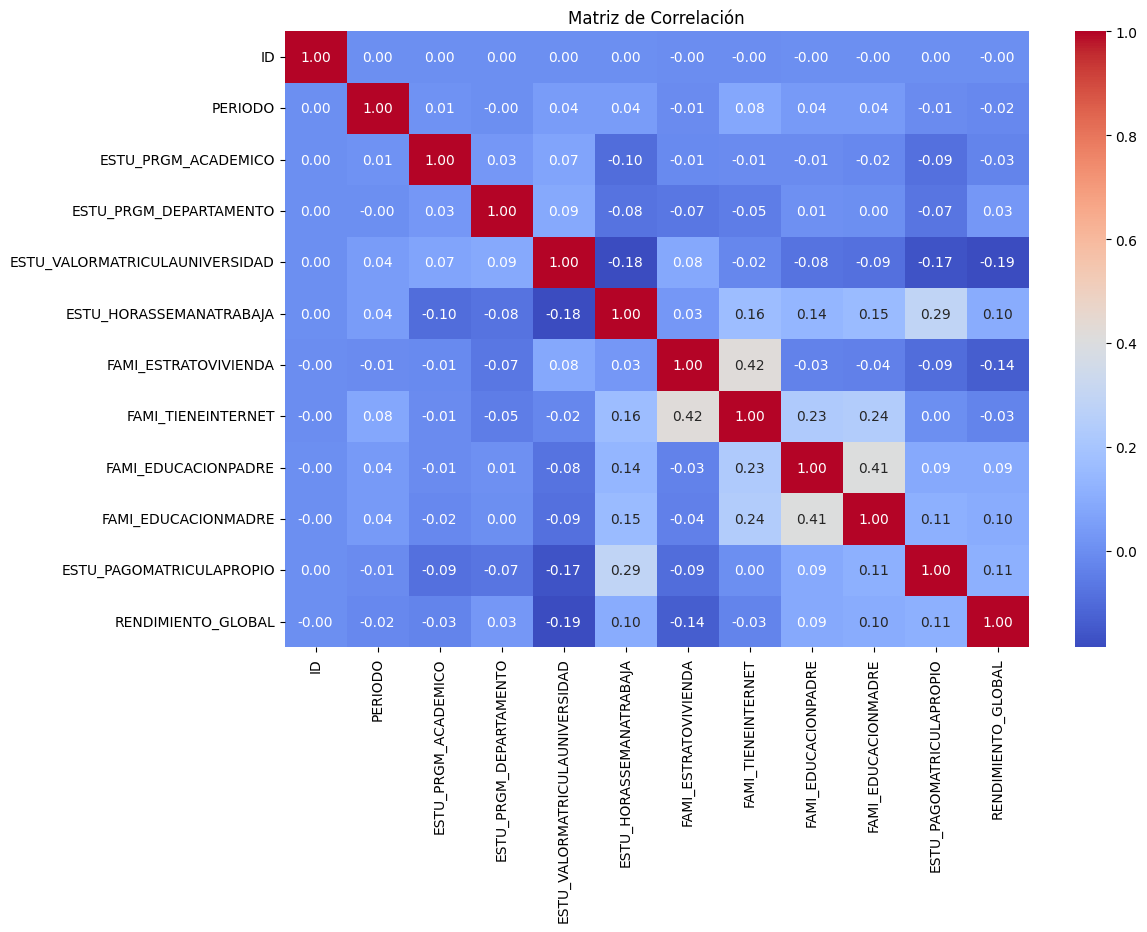

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable RENDIMIENTO_GLOBAL
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='RENDIMIENTO_GLOBAL')
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xlabel('Rendimiento Global')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la relación entre RENDIMIENTO_GLOBAL y ESTU_HORASSEMANATRABAJA
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='ESTU_HORASSEMANATRABAJA', y='RENDIMIENTO_GLOBAL')
plt.title('Rendimiento Global según Horas de Trabajo Semanal')
plt.xlabel('Horas de Trabajo Semanal')
plt.ylabel('Rendimiento Global')
plt.show()

# Visualizar la correlación entre variables
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('RENDIMIENTO_GLOBAL', axis=1)  # Variables independientes
y = df['RENDIMIENTO_GLOBAL']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
# Importar las librerías necesarias
import pandas as pd

# Rutas de los archivos
train_path = "/content/drive/MyDrive/udea-ai4eng-20242/train.csv"
# test_path = "/content/drive/MyDrive/udea-ai4eng-20242/test.csv"  # Comentar esta línea temporalmente
# submission_path = "/content/drive/MyDrive/udea-ai4eng-20242/submission_example.csv"  # Comentar esta línea temporalmente

# Cargar los datos
df = pd.read_csv(train_path)

# Limpiar los datos según sea necesario (eliminar filas con valores nulos en la variable dependiente)
df = df.dropna(subset=['RENDIMIENTO_GLOBAL'])

# Verificar valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Definir variables independientes y dependientes
X = df.drop('RENDIMIENTO_GLOBAL', axis=1)  # Variables independientes
y = df['RENDIMIENTO_GLOBAL']  # Variable dependiente

# Ver el tamaño del DataFrame después del preprocesado
print(f"Tamaño del DataFrame después de limpiar: {df.shape}")

# Opcional: Guardar el DataFrame preprocesado en un nuevo archivo CSV
df.to_csv('/content/drive/MyDrive/udea-ai4eng-20242/02_preprocesado.ipynb.csv', index=False)


Valores nulos por columna:
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64
Tamaño del DataFrame después de limpiar: (692500, 12)


In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import joblib

# Cargar los datos (reemplaza 'ruta_del_archivo.csv' con tu archivo real)
df = pd.read_csv('')

# Limpiar los datos según sea necesario (ya has hecho esto previamente)
# Por ejemplo, eliminar filas con valores nulos en la variable dependiente
df = df.dropna(subset=['RENDIMIENTO_GLOBAL'])

# Definir variables independientes y dependientes
X = df.drop('RENDIMIENTO_GLOBAL', axis=1)  # Variables independientes
y = df['RENDIMIENTO_GLOBAL']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Visualizar Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Ajuste de hiperparámetros (opcional)
params = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid_search = GridSearchCV(LinearRegression(), params, cv=5)

# Entrenar el modelo con la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(grid_search.best_params_)

# Validación cruzada
scores = cross_val_score(modelo, X_train, y_train, cv=5)
print(f'Scores de validación cruzada: {scores}')
print(f'Promedio de puntuación: {scores.mean()}')

# Guardar el modelo
joblib.dump(modelo, 'modelo_regresion_lineal.pkl')


Matriz de confusión:
[[20197  3692  6874  4402]
 [ 3692 16222  6060  8599]
 [ 9928  7580  8887  7864]
 [ 5932 11383  7854  9334]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54     35165
           1       0.42      0.47      0.44     34573
           2       0.30      0.26      0.28     34259
           3       0.31      0.27      0.29     34503

    accuracy                           0.39    138500
   macro avg       0.38      0.39      0.39    138500
weighted avg       0.38      0.39      0.39    138500



In [ ]:
# Comprobar valores nulos
print(df.isnull().sum())

# Imputar o eliminar valores nulos
df.fillna(method='ffill', inplace=True)  # Imputar con el anterior
# o
df.dropna(inplace=True)  # Eliminar filas con valores nulos


PERIODO                                  0
ESTU_VALORMATRICULAUNIVERSIDAD           0
ESTU_HORASSEMANATRABAJA             457902
FAMI_ESTRATOVIVIENDA                     0
FAMI_TIENEINTERNET                       0
                                     ...  
ESTU_PRGM_DEPARTAMENTO_SANTANDER         0
ESTU_PRGM_DEPARTAMENTO_SUCRE             0
ESTU_PRGM_DEPARTAMENTO_TOLIMA            0
ESTU_PRGM_DEPARTAMENTO_VALLE             0
ESTU_PRGM_DEPARTAMENTO_VAUPES            0
Length: 986, dtype: int64


<ipython-input-22-c81b3ad88a5b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Imputar con el anterior
